In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [60]:
STEP = 0.01
N_STEPS = 100
    
length = lambda v: np.linalg.norm(v)
normalize = lambda v: v * (1.0/length(v))
cross = np.cross
dot = np.dot
acos = np.arccos
sin = np.sin
cos = np.cos

M_PI = np.pi

In [43]:
def trace_line(pos, ray, path):
    
    for i in xrange(N_STEPS):
        path[i,:] = pos
        pos += ray*STEP

In [48]:
def trace_u(pos, ray, path):
    
    u = 1.0 / length(pos)
    
    n = normalize(cross(pos, ray))
    x = normalize(pos)
    y = cross(n,x)
    
    du = -dot(ray,x) / dot(ray,y) * u * u * u
    
    theta = acos(-dot(x,ray)) - M_PI*0.5
    y = ray
    x = cross(n,y)
    
    for j in range(N_STEPS):
        
        path[j,:] = pos
        
        step = 2.0*M_PI / float(N_STEPS)

        ddu = -u*(1.0 - 1.5*u*u)
        u += du*step

        if u < 0.0: break

        du += ddu*step

        theta += step

        old_pos = pos
        pos = (cos(theta)*x + sin(theta)*y)/u

In [61]:
def trace_fan(func):

    pos0 = (-2,0,0)
    spread_ang = 60 / 180.0 * np.pi
    n_rays = 20
    
    paths_x = np.zeros((N_STEPS, n_rays))
    paths_y = paths_x*0
    
    angles = np.linspace(0, spread_ang, n_rays+1)[1:]

    for j in range(len(angles)):
        
        path = np.zeros((N_STEPS,3)) + np.nan
        
        a = angles[j]
        ray = (np.cos(a), np.sin(a), 0)
        
        pos = np.ravel(pos0).T * 1.0
        ray = np.ravel(ray).T * 1.0
        
        func(pos, ray, path)
        paths_x[:,j] = path[:,0]
        paths_y[:,j] = path[:,1]
        
    plt.plot(paths_x, paths_y)
    plt.xlim([-3,3])
    plt.ylim([-2,2])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: RuntimeWarning: overflow encountered in double_scalars


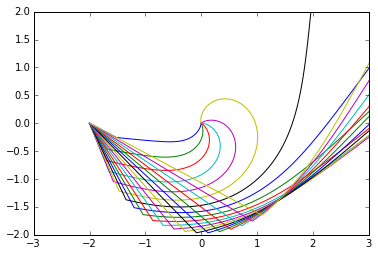

In [62]:
trace_fan(trace_u)